In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tools.internal_loads import internal_loads

#### Input shaft

In [16]:
input_shaft_length = 2                                   # in
face_width1, face_width2 = 1.304, 4.768
radius_p1 = 3.7 / 2                                      # in
position_p1 = np.array([0, 0, input_shaft_length/2])     # in

weight_p1 = np.array([0, -4.03797, 0])                   # lb
mean_forces_p1 = np.array([290.907, -799.262 , 0])       # lb
alt_forces_p1 = np.array([67.1326, -184.445, 0])         # lb

# List of all the applied mean loads
mean_applied_loads = [[weight_p1, position_p1], 
                      [mean_forces_p1, position_p1 - radius_p1 * np.array([1, 0, 0])], 
                      [-mean_forces_p1, position_p1 + radius_p1 * np.array([1, 0, 0])]]

# List of all the applied alternating loads
alt_applied_loads = [[alt_forces_p1, position_p1 - radius_p1 * np.array([1, 0, 0])], 
                     [-alt_forces_p1, position_p1 + radius_p1 * np.array([1, 0, 0])]]

Mean moment magnitude at gear 2: 2.02 lb-in
Maximum mean moment: 2.02 lb-in


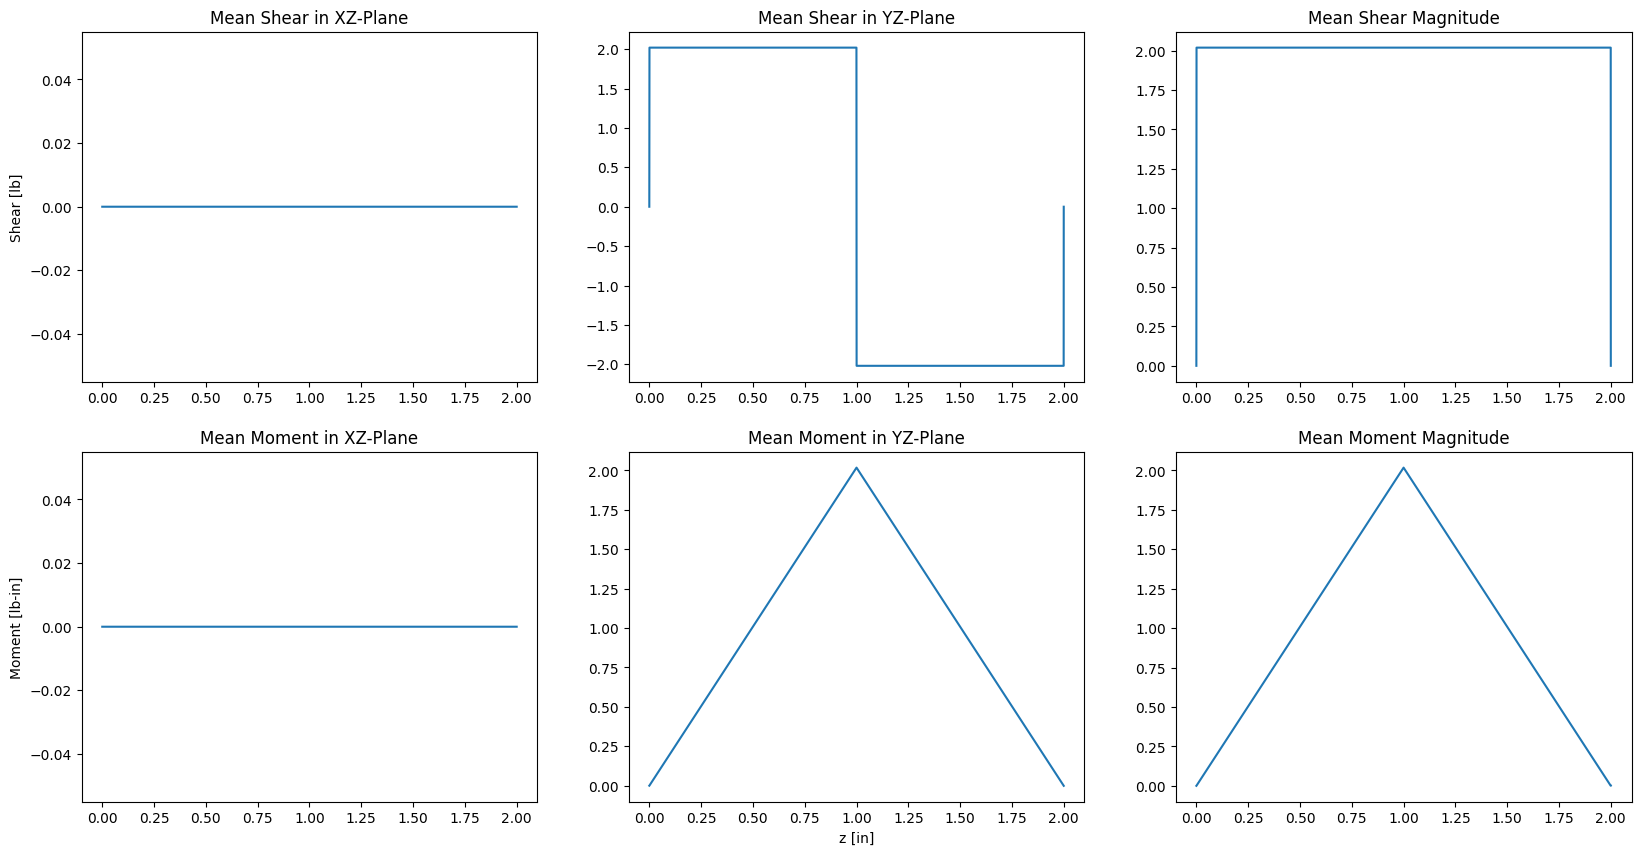

Alternating moment magnitude at gear 2: 0.0 lb-in
Maximum Alternating moment: 0.0 lb-in


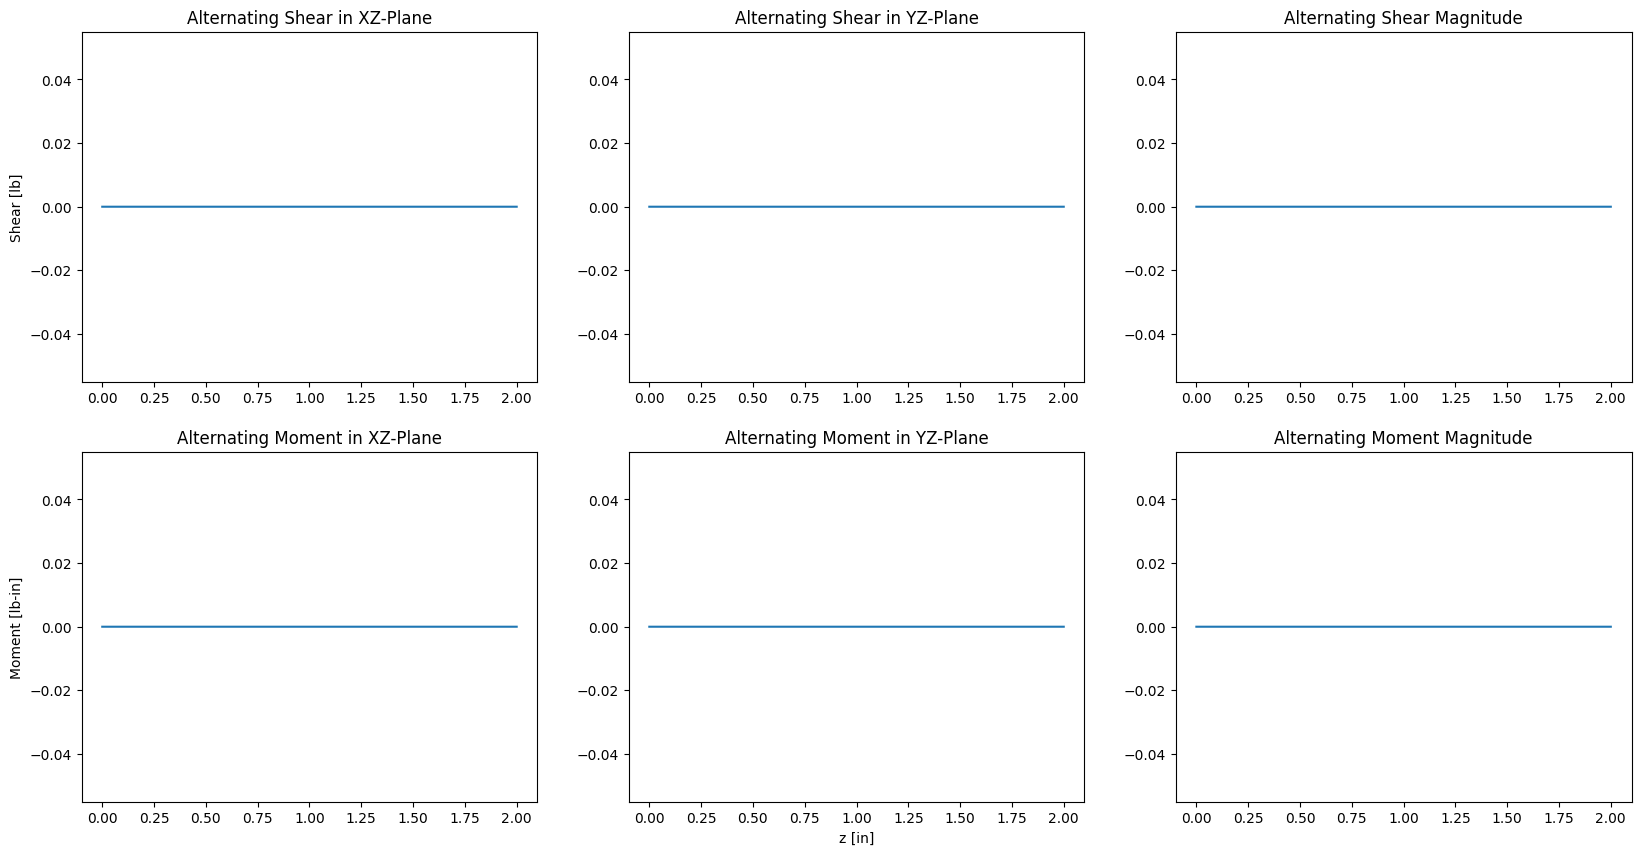

In [17]:
# Computes the shears and bending moments of the mean loads at 5001 points on the shaft with the 
# internal_loads function defined in the file internal_loads.py in the tools folder
z, shears, moments = internal_loads(mean_applied_loads, input_shaft_length, 5001)
idx_p1 = np.abs((z - position_p1[2])).argmin()
moment_magnitude = np.linalg.norm(moments, axis = 0)
print(f"Mean moment magnitude at gear 2: {np.round(moment_magnitude[idx_p1],2)} lb-in")
print(f"Maximum mean moment: {np.round(np.max(moment_magnitude),2)} lb-in")

# Plots the shear and bending moment diagrams
fig, axs = plt.subplots(2, 3)
fig.set_figwidth(20), fig.set_figheight(10)
axs[0,0].plot(z, shears[0,:]), axs[0,1].plot(z, shears[1,:]), axs[0,2].plot(z, np.linalg.norm(shears, axis=0))
axs[1,0].plot(z, moments[0,:]), axs[1,1].plot(z, moments[1,:]), axs[1,2].plot(z, np.linalg.norm(moments, axis=0))
axs[0,0].set_ylabel("Shear [lb]"), axs[1,0].set_ylabel("Moment [lb-in]")
axs[1,1].set_xlabel("z [in]") 
axs[0,0].set_title("Mean Shear in XZ-Plane"), axs[1,1].set_title("Mean Moment in YZ-Plane")
axs[0,1].set_title("Mean Shear in YZ-Plane"), axs[1,0].set_title("Mean Moment in XZ-Plane")
axs[0,2].set_title("Mean Shear Magnitude"), axs[1,2].set_title("Mean Moment Magnitude")
plt.show()

# Computes the shears and bending moments of the alternating loads at 5001 points on the shaft with the 
# internal_loads function defined in the file internal_loads.py in the tools folder
z, shears, moments = internal_loads(alt_applied_loads, input_shaft_length , 5001)
idx_p1 = np.abs((z - position_p1[2])).argmin()
moment_magnitude = np.linalg.norm(moments, axis = 0)
print(f"Alternating moment magnitude at gear 2: {np.round(moment_magnitude[idx_p1],2)} lb-in")
print(f"Maximum Alternating moment: {np.round(np.max(moment_magnitude),2)} lb-in")

# Plots the shear and bending moment diagrams
fig, axs = plt.subplots(2, 3)
fig.set_figwidth(20), fig.set_figheight(10)
axs[0,0].plot(z, shears[0,:]), axs[0,1].plot(z, shears[1,:]), axs[0,2].plot(z, np.linalg.norm(shears, axis=0))
axs[1,0].plot(z, moments[0,:]), axs[1,1].plot(z, moments[1,:]), axs[1,2].plot(z, np.linalg.norm(moments, axis=0))
axs[0,0].set_ylabel("Shear [lb]"), axs[1,0].set_ylabel("Moment [lb-in]")
axs[1,1].set_xlabel("z [in]") 
axs[0,0].set_title("Alternating Shear in XZ-Plane"), axs[1,1].set_title("Alternating Moment in YZ-Plane")
axs[0,1].set_title("Alternating Shear in YZ-Plane"), axs[1,0].set_title("Alternating Moment in XZ-Plane")
axs[0,2].set_title("Alternating Shear Magnitude"), axs[1,2].set_title("Alternating Moment Magnitude")
plt.show()


#### Intermediate Shaft

In [18]:
intermediate_shaft_length = 11.625                                           # in
radius_g1, radius_p2 = 13.5 / 2, 3.7 / 2                                     # in
position_g1, position_p2 = np.array([0, 0, 1.625]), np.array([0, 0, 8.1875]) # in

weight_g1, weight_p2 = np.array([0, -53.7561, 0]), np.array([0, -14.7646 , 0])                     # lb
mean_forces_g1, mean_forces_p2 = np.array([305.453, -839.225, 0]), np.array([1114.19, 3062.04, 0]) # lb
alt_forces_g1, alt_forces_p2 = np.array([70.4891, -193.667, 0]), np.array([257.19, 706.624, 0])    # lb

# List of all the applied mean loads
mean_applied_loads = [[weight_g1, position_g1], 
                      [weight_p2, position_p2],
                      [mean_forces_g1, position_g1 - radius_g1 * np.array([1, 0, 0])], 
                      [mean_forces_p2, position_p2 - radius_p2 * np.array([1, 0, 0])]]

# List of all the applied alternating loads
alt_applied_loads = [[alt_forces_g1, position_g1 - radius_g1 * np.array([1, 0, 0])], 
                     [alt_forces_p2, position_p2 - radius_p2 * np.array([1, 0, 0])]]


Mean moment magnitude at gear 1: 985.58 lb-in
Mean moment magnitude at step 1: 1449.46 lb-in
Mean moment magnitude at pinion 2: 7505.82 lb-in
Mean moment magnitude at step 2: 4994.19 lb-in
Maximum mean moment: 7507.13 lb-in


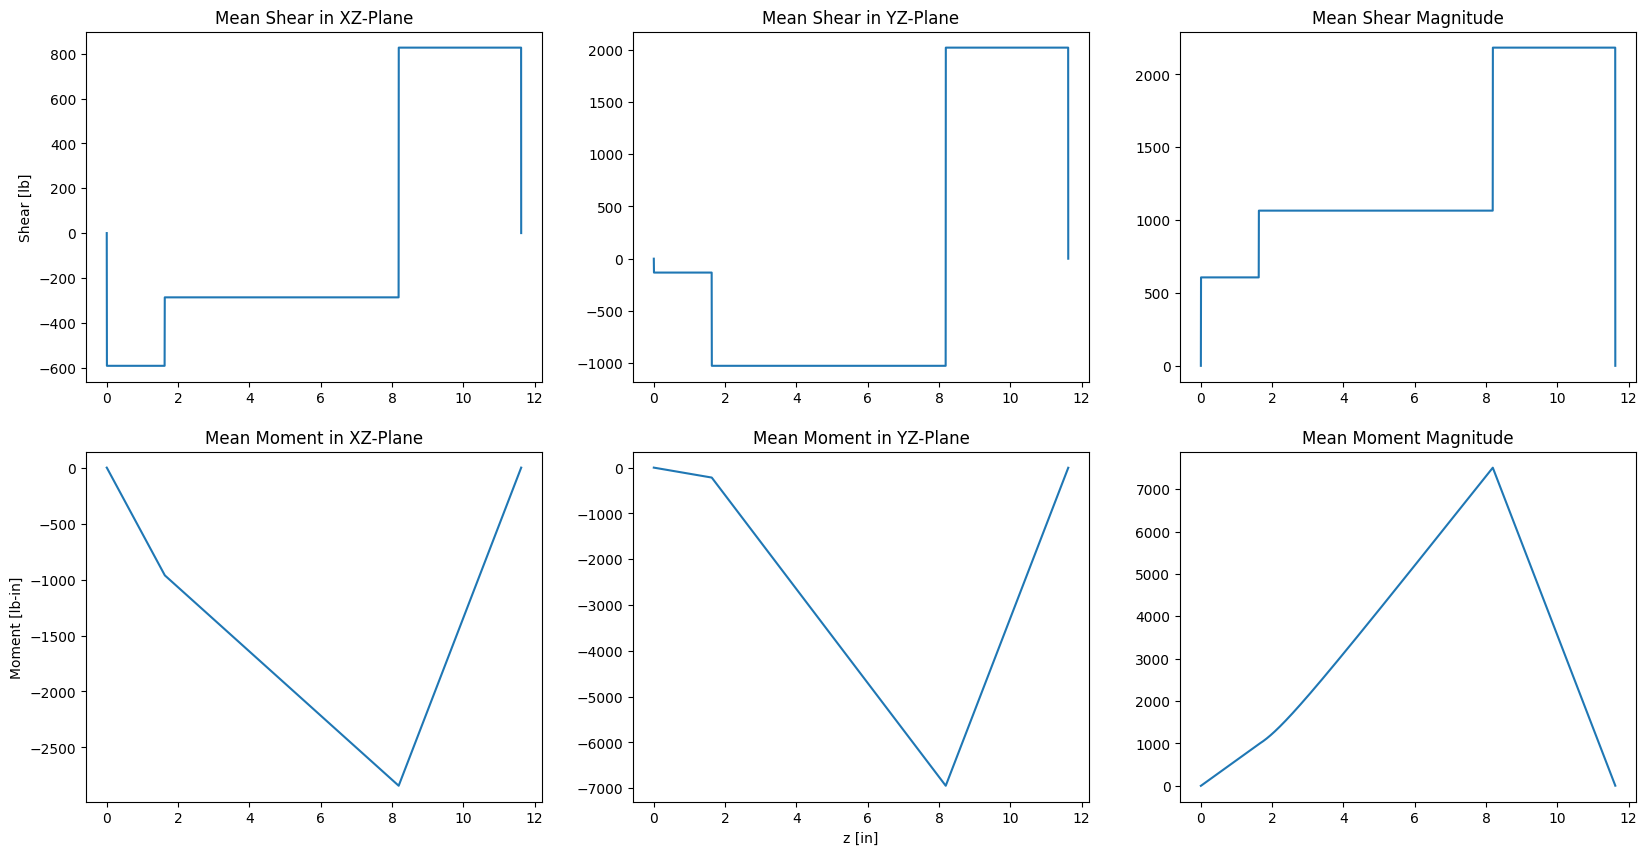

Alternating moment magnitude at gear 1: 232.38 lb-in
Alternating moment magnitude at step 1: 346.12 lb-in
Alternating moment magnitude at pinion 2: 1745.3 lb-in
Alternating moment magnitude at step 2: 1166.93 lb-in
Maximum alternating moment: 1745.61 lb-in


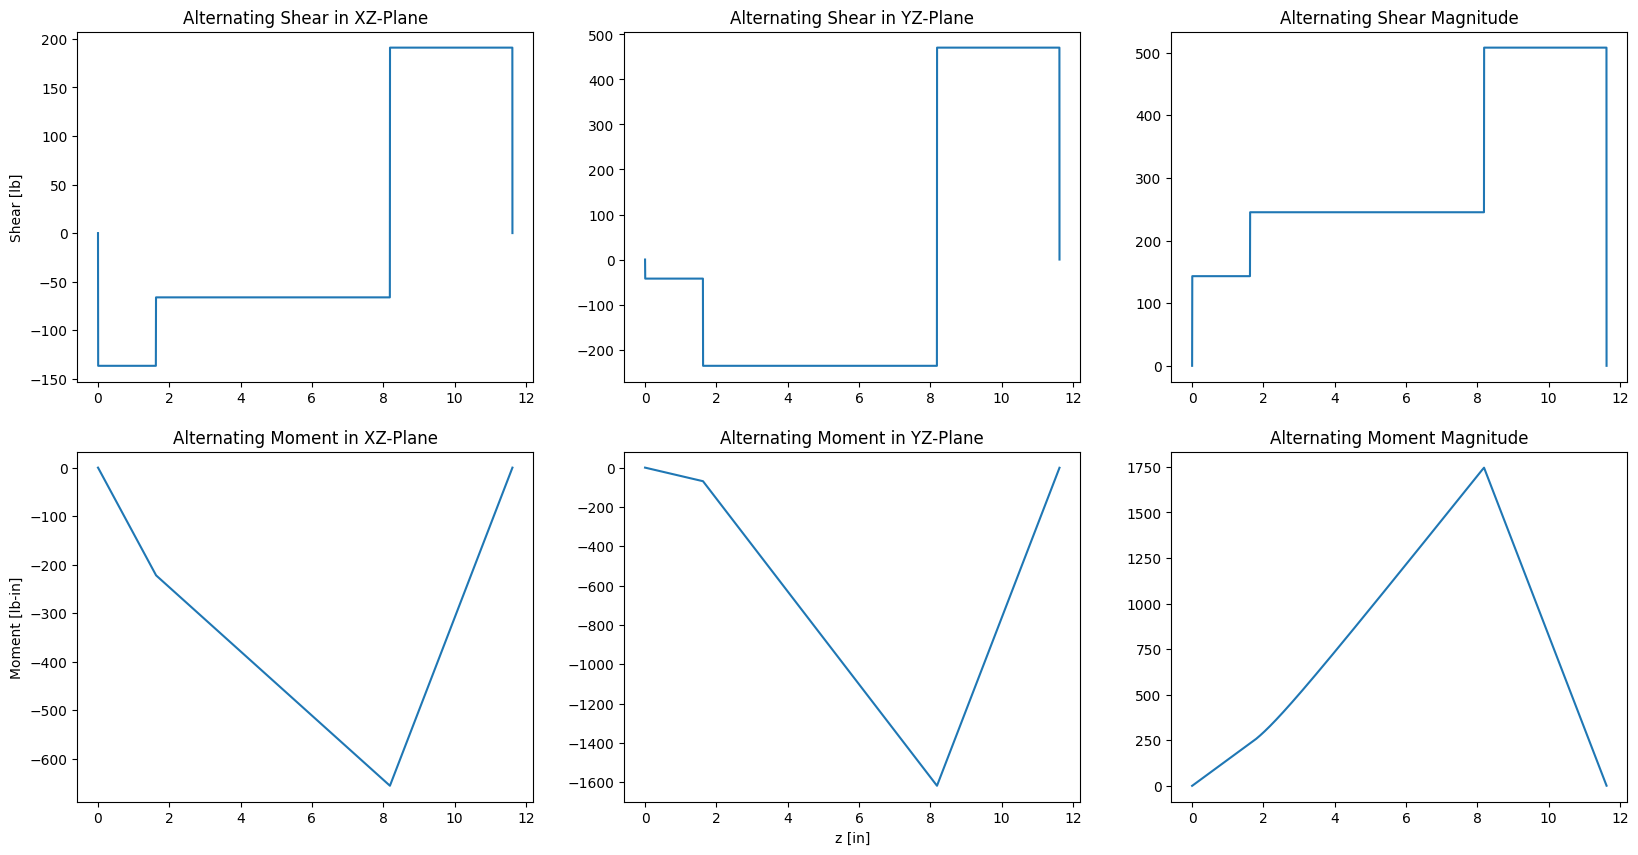

In [19]:
# Computes the shears and bending moments of the mean loads at 5001 points on the shaft with the 
# internal_loads function defined in the file internal_loads.py in the tools folder
z, shears, moments = internal_loads(mean_applied_loads, intermediate_shaft_length , 5001)
idx_g1 = np.abs((z - position_g1[2])).argmin()
idx_g1_step = np.abs((z - (position_g1[2] + face_width1/2))).argmin()
idx_p2 = np.abs((z - position_p2[2])).argmin()
idx_p2_step = np.abs((z - (position_p2[2] - face_width2/2))).argmin()
moment_magnitude = np.linalg.norm(moments, axis = 0)
print(f"Mean moment magnitude at gear 1: {np.round(moment_magnitude[idx_g1],2)} lb-in")
print(f"Mean moment magnitude at step 1: {np.round(moment_magnitude[idx_g1_step],2)} lb-in")
print(f"Mean moment magnitude at pinion 2: {np.round(moment_magnitude[idx_p2],2)} lb-in")
print(f"Mean moment magnitude at step 2: {np.round(moment_magnitude[idx_p2_step],2)} lb-in")
print(f"Maximum mean moment: {np.round(np.max(moment_magnitude),2)} lb-in")


# Plots the shear and bending moment diagrams
fig, axs = plt.subplots(2, 3)
fig.set_figwidth(20), fig.set_figheight(10)
axs[0,0].plot(z, shears[0,:]), axs[0,1].plot(z, shears[1,:]), axs[0,2].plot(z, np.linalg.norm(shears, axis=0))
axs[1,0].plot(z, moments[0,:]), axs[1,1].plot(z, moments[1,:]), axs[1,2].plot(z, np.linalg.norm(moments, axis=0))
axs[0,0].set_ylabel("Shear [lb]"), axs[1,0].set_ylabel("Moment [lb-in]")
axs[1,1].set_xlabel("z [in]") 
axs[0,0].set_title("Mean Shear in XZ-Plane"), axs[1,1].set_title("Mean Moment in YZ-Plane")
axs[0,1].set_title("Mean Shear in YZ-Plane"), axs[1,0].set_title("Mean Moment in XZ-Plane")
axs[0,2].set_title("Mean Shear Magnitude"), axs[1,2].set_title("Mean Moment Magnitude")
plt.show()

# Computes the shears and bending moments of the alternating loads at 5001 points on the shaft with the 
# internal_loads function defined in the file internal_loads.py in the tools folder
z, shears, moments = internal_loads(alt_applied_loads, intermediate_shaft_length , 5001)
idx_g1 = np.abs((z - position_g1[2])).argmin()
idx_g1_step = np.abs((z - (position_g1[2] + face_width1/2))).argmin()
idx_p2 = np.abs((z - position_p2[2])).argmin()
idx_p2_step = np.abs((z - (position_p2[2] - face_width2/2))).argmin()
moment_magnitude = np.linalg.norm(moments, axis = 0)
print(f"Alternating moment magnitude at gear 1: {np.round(moment_magnitude[idx_g1],2)} lb-in")
print(f"Alternating moment magnitude at step 1: {np.round(moment_magnitude[idx_g1_step],2)} lb-in")
print(f"Alternating moment magnitude at pinion 2: {np.round(moment_magnitude[idx_p2],2)} lb-in")
print(f"Alternating moment magnitude at step 2: {np.round(moment_magnitude[idx_p2_step],2)} lb-in")
print(f"Maximum alternating moment: {np.round(np.max(moment_magnitude),2)} lb-in")

# Plots the shear and bending moment diagrams
fig, axs = plt.subplots(2, 3)
fig.set_figwidth(20), fig.set_figheight(10)
axs[0,0].plot(z, shears[0,:]), axs[0,1].plot(z, shears[1,:]), axs[0,2].plot(z, np.linalg.norm(shears, axis=0))
axs[1,0].plot(z, moments[0,:]), axs[1,1].plot(z, moments[1,:]), axs[1,2].plot(z, np.linalg.norm(moments, axis=0))
axs[0,0].set_ylabel("Shear [lb]"), axs[1,0].set_ylabel("Moment [lb-in]")
axs[1,1].set_xlabel("z [in]") 
axs[0,0].set_title("Alternating Shear in XZ-Plane"), axs[1,1].set_title("Alternating Moment in YZ-Plane")
axs[0,1].set_title("Alternating Shear in YZ-Plane"), axs[1,0].set_title("Alternating Moment in XZ-Plane")
axs[0,2].set_title("Alternating Shear Magnitude"), axs[1,2].set_title("Alternating Moment Magnitude")
plt.show()


#### Output Shaft

In [20]:
output_shaft_length = 7.1875                          # in
radius_g2 = 13.5 / 2                                  # in
position_g2 = np.array([0, 0, output_shaft_length/2]) # in

weight_g2 = np.array([0, -196.556, 0])                # lb
mean_forces_g2 = np.array([1170.21, 3215.14, 0])      # lb
alt_forces_g2 = np.array([270.049, 741.995, 0])       # lb

# List of all the applied mean loads
mean_applied_loads = [[weight_g2, position_g2], 
                      [mean_forces_g2, position_g2 - radius_g2 * np.array([1, 0, 0])], 
                      [-mean_forces_g2, position_g2 + radius_g2 * np.array([1, 0, 0])]]

# List of all the alternating mean loads
alt_applied_loads = [[alt_forces_g2, position_g2 - radius_g2 * np.array([1, 0, 0])], 
                     [-alt_forces_g2, position_g2 + radius_p2 * np.array([1, 0, 0])]]

Mean moment magnitude at gear 2: 352.97 lb-in
Maximum mean moment: 352.97 lb-in


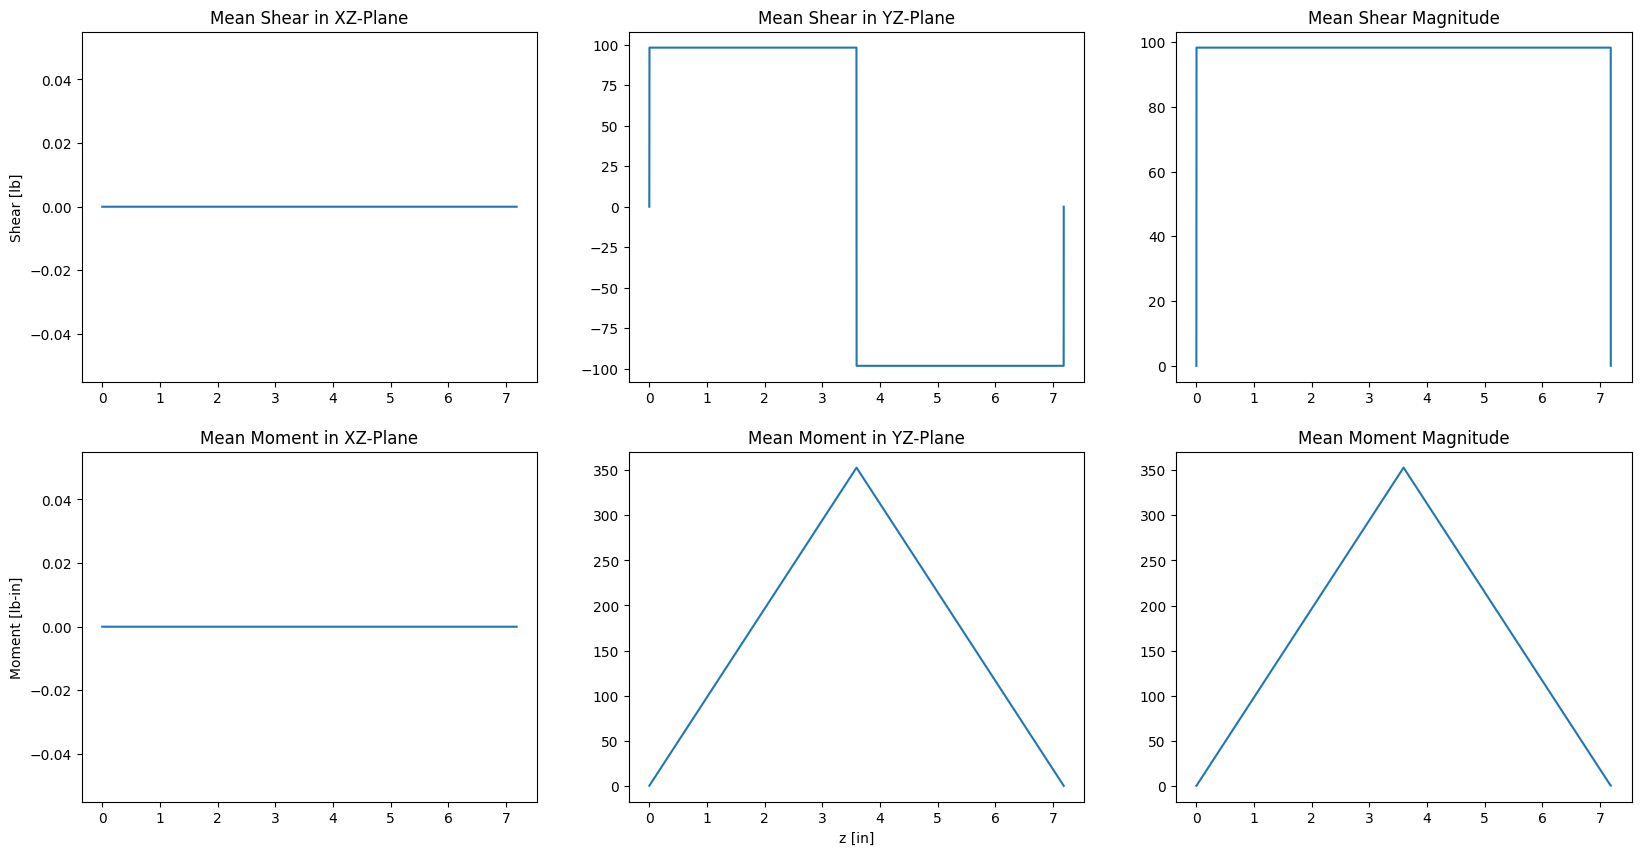

Alternating moment magnitude at gear 2: 0.0 lb-in
Maximum alternating moment: 0.0 lb-in


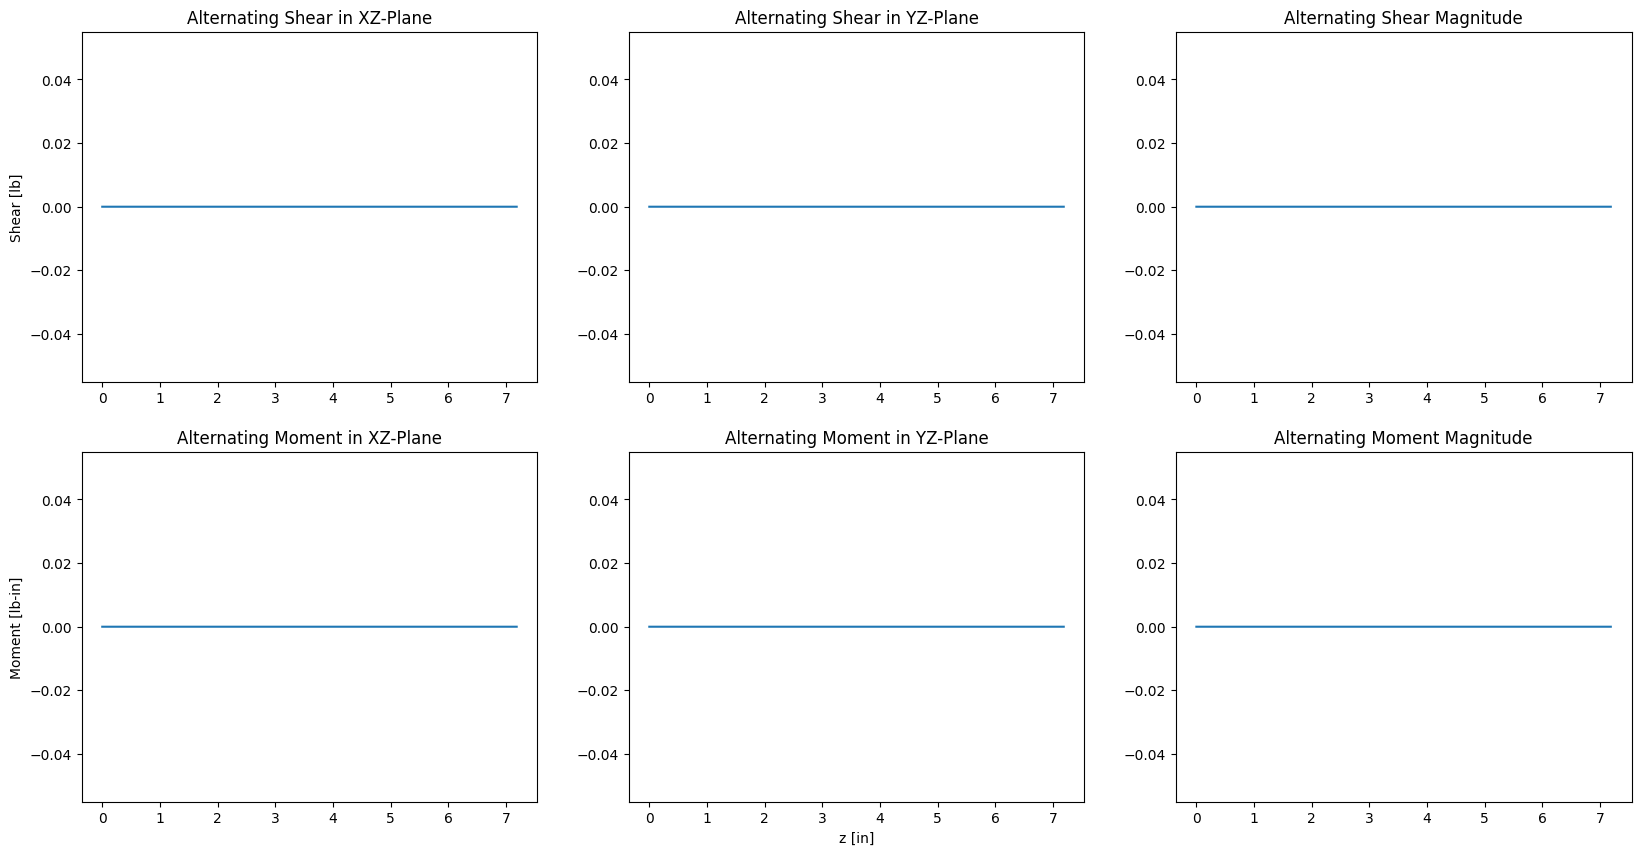

In [21]:
# Computes the shears and bending moments of the mean loads at 5001 points on the shaft with the 
# internal_loads function defined in the file internal_loads.py in the tools folder
z, shears, moments = internal_loads(mean_applied_loads, output_shaft_length, 5001)
idx_g2 = np.abs((z - position_g2[2])).argmin()
moment_magnitude = np.linalg.norm(moments, axis = 0)
print(f"Mean moment magnitude at gear 2: {np.round(moment_magnitude[idx_g2],2)} lb-in")
print(f"Maximum mean moment: {np.round(np.max(moment_magnitude),2)} lb-in")


# Plots the shear and bending moment diagrams
fig, axs = plt.subplots(2, 3)
fig.set_figwidth(20), fig.set_figheight(10)
axs[0,0].plot(z, shears[0,:]), axs[0,1].plot(z, shears[1,:]), axs[0,2].plot(z, np.linalg.norm(shears, axis=0))
axs[1,0].plot(z, moments[0,:]), axs[1,1].plot(z, moments[1,:]), axs[1,2].plot(z, np.linalg.norm(moments, axis=0))
axs[0,0].set_ylabel("Shear [lb]"), axs[1,0].set_ylabel("Moment [lb-in]")
axs[1,1].set_xlabel("z [in]") 
axs[0,0].set_title("Mean Shear in XZ-Plane"), axs[1,1].set_title("Mean Moment in YZ-Plane")
axs[0,1].set_title("Mean Shear in YZ-Plane"), axs[1,0].set_title("Mean Moment in XZ-Plane")
axs[0,2].set_title("Mean Shear Magnitude"), axs[1,2].set_title("Mean Moment Magnitude")
plt.show()

# Computes the shears and bending moments of the alternating loads at 5001 points on the shaft with the 
# internal_loads function defined in the file internal_loads.py in the tools folder
z, shears, moments = internal_loads(alt_applied_loads, output_shaft_length , 5001)
idx_g2 = np.abs((z - position_g2[2])).argmin()
moment_magnitude = np.linalg.norm(moments, axis = 0)
print(f"Alternating moment magnitude at gear 2: {np.round(moment_magnitude[idx_g2],2)} lb-in")
print(f"Maximum alternating moment: {np.round(np.max(moment_magnitude),2)} lb-in")

# Plots the shear and bending moment diagrams
fig, axs = plt.subplots(2, 3)
fig.set_figwidth(20), fig.set_figheight(10)
axs[0,0].plot(z, shears[0,:]), axs[0,1].plot(z, shears[1,:]), axs[0,2].plot(z, np.linalg.norm(shears, axis=0))
axs[1,0].plot(z, moments[0,:]), axs[1,1].plot(z, moments[1,:]), axs[1,2].plot(z, np.linalg.norm(moments, axis=0))
axs[0,0].set_ylabel("Shear [lb]"), axs[1,0].set_ylabel("Moment [lb-in]")
axs[1,1].set_xlabel("z [in]") 
axs[0,0].set_title("Alternating Shear in XZ-Plane"), axs[1,1].set_title("Alternating Moment in YZ-Plane")
axs[0,1].set_title("Alternating Shear in YZ-Plane"), axs[1,0].set_title("Alternating Moment in XZ-Plane")
axs[0,2].set_title("Alternating Shear Magnitude"), axs[1,2].set_title("Alternating Moment Magnitude")
plt.show()
